In [1]:
import api
import pandas as pd
df = api.get_merged_dataframe('14L', '5.1')
#14L to select Manchester CCG and 5.1 to select Antibacterial group
df.head()

,setting,actual_cost,items,row_id,ccg,quantity,row_name,date,total_list_size,items_per_patient
0,4,2856.64,417,P84004,14L,18650,FIVE OAKS FAMILIY PRACTICE,2014-10-01,8819,0.047284
1,4,919.79,203,P84005,14L,8165,THE VALLANCE CENTRE,2014-10-01,7223,0.028105
2,4,2063.74,357,P84009,14L,17084,AILSA CRAIG MEDICAL CENTRE,2014-10-01,9342,0.038215
3,4,1873.21,423,P84010,14L,17154,THE BORCHARDT MEDICAL CENTRE,2014-10-01,11108,0.038081
4,4,2992.22,644,P84012,14L,28069,NORTHENDEN GROUP PRACTICE,2014-10-01,11028,0.058397


In [2]:
def get_min_max_practice_from_dataframe(df):
    means={}
    for practice in df['row_name'].unique():
        practice_df = df[df.row_name == practice]
        average = practice_df["items_per_patient"].mean()
        means[practice] = average 
    minimum = min(means, key=means.get)
    maximum = max(means, key=means.get)
    output = {
        "minimum": minimum,
        "maximum": maximum
    }
    return output
    

means=get_min_max_practice_from_dataframe(df)

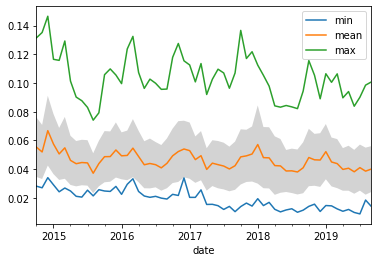

In [62]:
def plot_min_max_mean(df):
    minmax = get_min_max_practice_from_dataframe(df)
    mean = df['items_per_patient'].groupby(df['date']).mean()
    stdev = df['items_per_patient'].groupby(df['date']).std()
    mean = pd.DataFrame({'date': mean.index, 'items_per_patient': mean.values})
    mean['date'] = pd.to_datetime(mean['date'])
    minimum = df[df.row_name == minmax['minimum']]
    maximum = df[df.row_name == minmax['maximum']]
    df = pd.DataFrame()
    df['date'] = mean['date']
    df['min'] = minimum['items_per_patient'].values
    df['mean'] = mean['items_per_patient'].values
    df['std_low'] = mean['items_per_patient'].values - stdev.values
    df['std_high'] = mean['items_per_patient'].values + stdev.values
    df['max'] = maximum['items_per_patient'].values
    plot = df.plot(x = 'date', y=['min', 'mean', 'max'])
    plot = plot.fill_between(df['date'].values, df['std_low'].values, df['std_high'].values, facecolor='lightgray')
    return plot 
    
plot = plot_min_max_mean(df)

